<a href="https://colab.research.google.com/github/jere1882/DL_IADS22/blob/main/CNN_Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers # Library for Neural Network
from keras import models 

A convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()

# Block 1.  I add 32 kernels of size 3x3 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 1 Layers
model.add(layers.MaxPooling2D((2, 2)))

# Block 2. I add 64 kernels of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))  # output probabilities
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Training the convnet on MNIST images

In [4]:
import tensorflow as tf

In [5]:
from keras.datasets import mnist

#### Load Data

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
train_images = train_images.reshape((60000, 28, 28, 1)) #The data is flattened; we reshape it to have matrix form
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

#### compile and fit model 

In [9]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2) # 20% of the data is used for validation

Epoch 1/5
750/750 [==============================] - 17s 5ms/step - loss: 0.2053 - accuracy: 0.9366 - val_loss: 0.0584 - val_accuracy: 0.9830
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0534 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0372 - val_accuracy: 0.9900


#### evaluate model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.9940


0.9940000176429749

In [11]:
import numpy as np

img = test_images[1, :, :, :]

img1 = np.expand_dims(img, axis=0)

y = model.predict(img1)
print(y)

[[4.4059458e-09 2.3124782e-07 9.9999976e-01 1.9043687e-13 3.5072812e-14
  2.8362876e-14 3.7389456e-11 2.8358499e-10 1.5694383e-11 3.3759315e-14]]


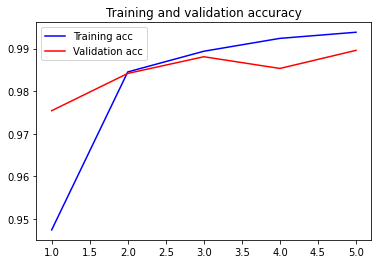

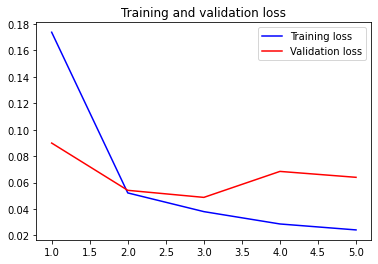

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', color="red",label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [13]:
# Experiment 1: What if we add a more powerful densely layer network at the end?

model = models.Sequential()

# Block 1.  I add 32 kernels of size 3x3 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 1 Layers
model.add(layers.MaxPooling2D((2, 2)))

# Block 2. I add 64 kernels of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu')) 
model.add(layers.Dense(30, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))  # output probabilities
model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2) # 20% of the data is used for validation

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

0.9904000163078308

In [14]:
# Experiment 2: What if we add a much more powerful densely layer network at the end?

model = models.Sequential()

# Block 1.  I add 32 kernels of size 3x3 
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1))) # 1 Layers
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Conv2D(100, (2, 2), activation='relu'))

# Block 3
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu')) 
model.add(layers.Dense(500, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))  # output probabilities
model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2) # 20% of the data is used for validation

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        4128      
                                                                 
 conv2d_8 (Conv2D)           (None, 23, 23, 64)        8256      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 100)       25700     
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 64)        25664     
                                                                 
 flatten_2 (Flatten)         (None, 28224)             0         
                                                                 
 dense_5 (Dense)             (None, 1000)             

0.9889000058174133

In [18]:
# A very simple network that achieves 99% performance
model = models.Sequential(
    [
        models.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_split=0.2) # 20% of the data is used for validation

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

0.9911999702453613